<a href="https://colab.research.google.com/github/ChDamodhar/tekWorks/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=sns.load_dataset("titanic")
df.head()
print(df.shape)
print(df.info())
print(df.describe(include='all'))

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
          survived      pclass   sex         age       sibsp    

In [ ]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percentage':df.isnull().sum()/df.shape[0]*100
})
missing.sort_values(by='missing_percentage',ascending=False)

,missing_count,missing_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [ ]:
df["age"]=df["age"].fillna(df["age"].mean())
df["embarked"]=df["embarked"].fillna(df["embarked"].mode()[0])
#df.drop(columns=["deck"],inplace=True)
print("Missing values after cleaning:",df.isnull().sum().sum())


Missing values after cleaning: 2


In [ ]:
print(df.duplicated().sum())
df["class"]=df["class"].astype("category")
df['sex']=df['sex'].astype('category')
df['embark_town']=df['embark_town'].astype('category')
df.info()

111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    category
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


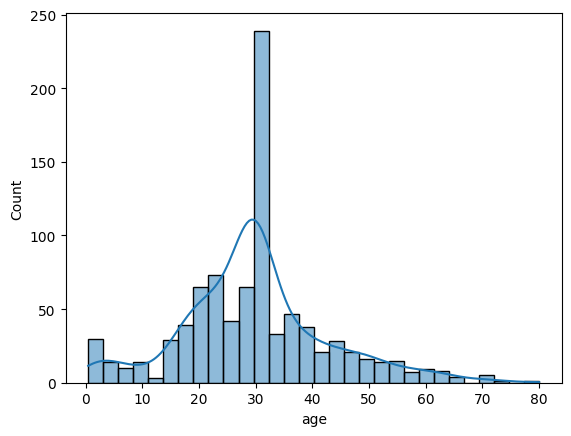

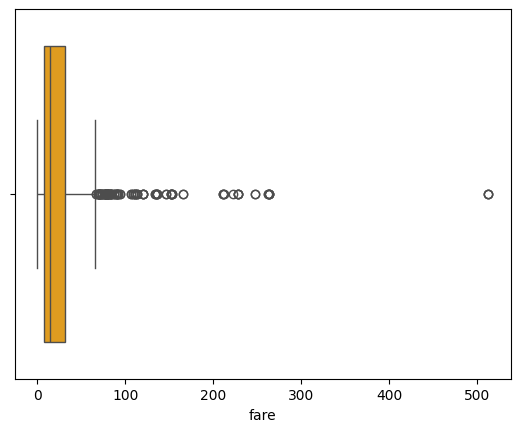

In [ ]:
num_cols=df.select_dtypes(include=["float64","int64"]).columns
df[num_cols].describe()

sns.histplot(df["age"],kde=True)
plt.show()

sns.boxplot(x=df["fare"],color="orange")
plt.show()



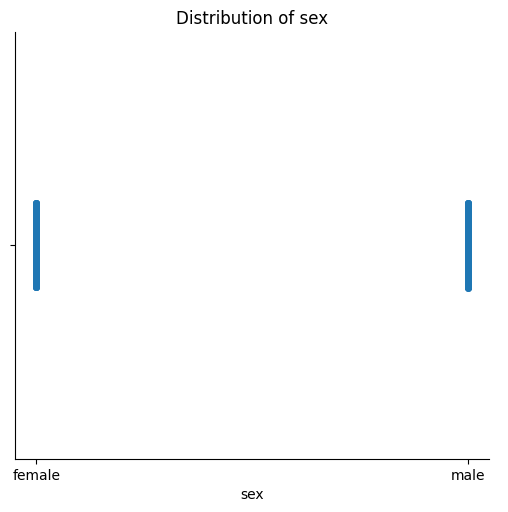

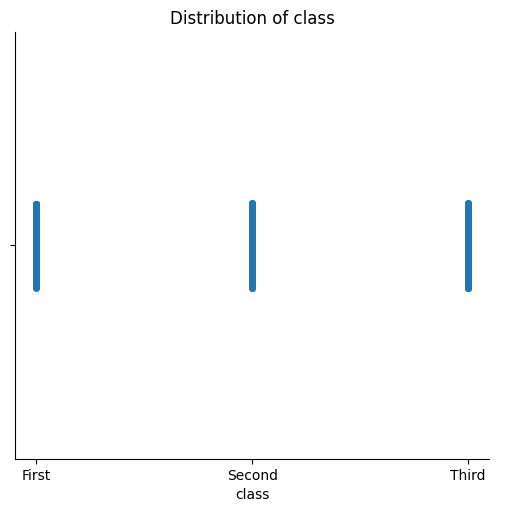

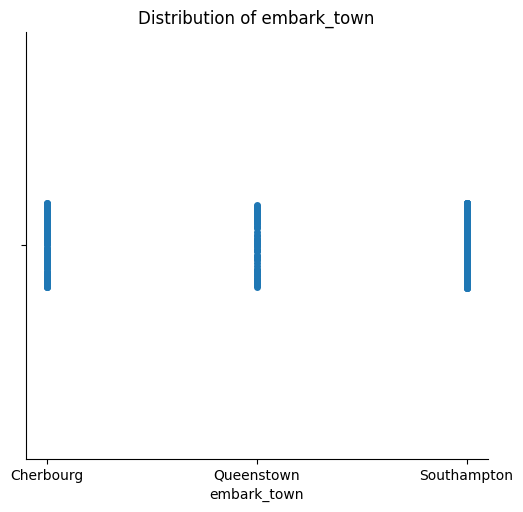

In [ ]:
#univariant
cat_cols=df.select_dtypes("category").columns
for col in cat_cols:
  sns.catplot(x=col,data=df)
  plt.title(f"Distribution of {col}")
  plt.show()


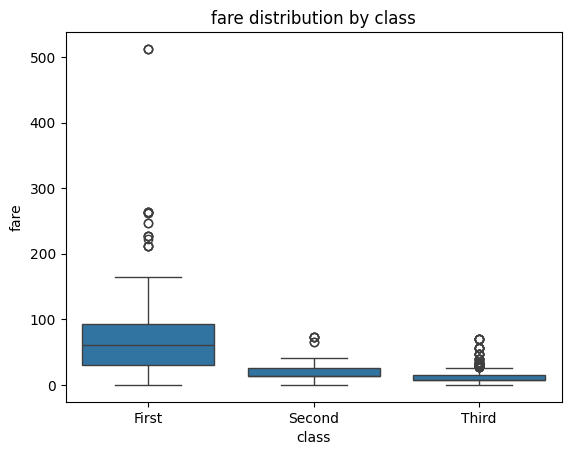

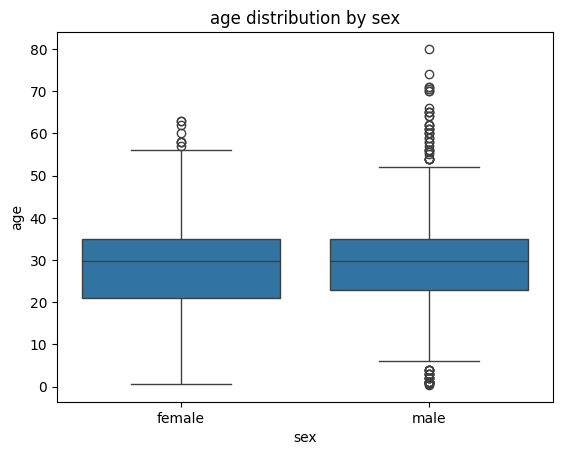

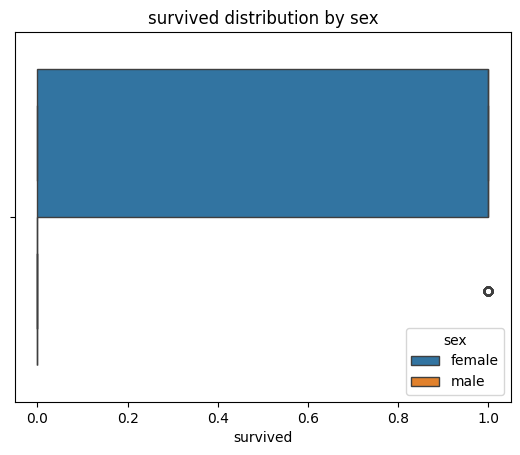

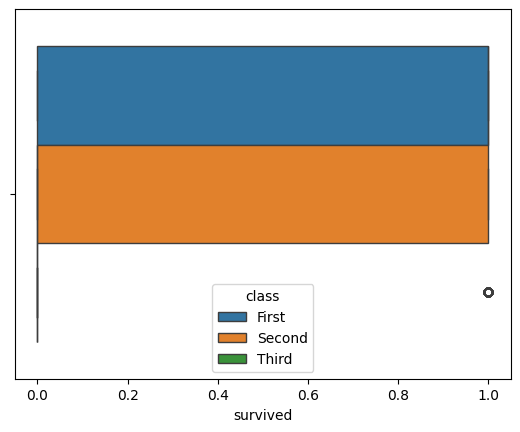

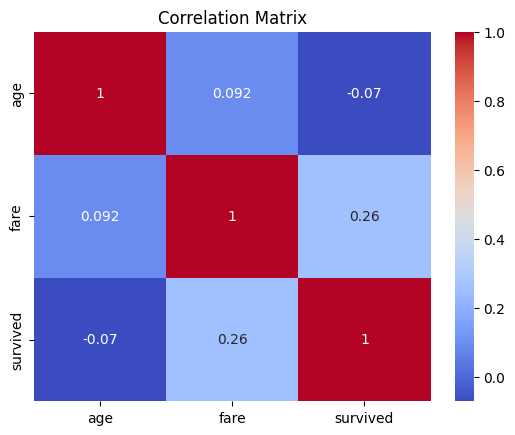

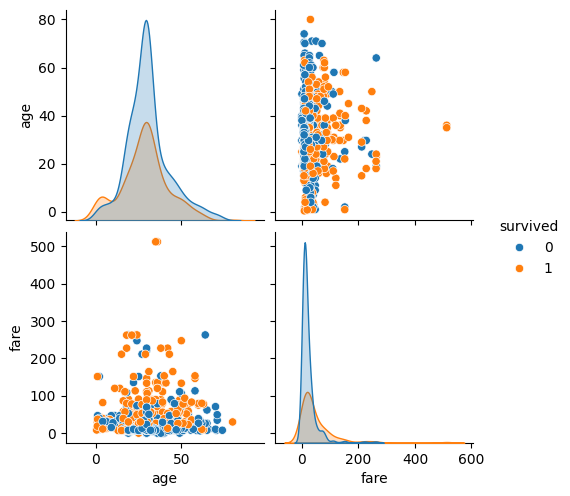

In [ ]:
#Bivariant
sns.boxplot(x="class",y="fare",data=df)
plt.title("fare distribution by class")
plt.show()

sns.boxplot(x="sex",y="age",data=df)
plt.title("age distribution by sex")
plt.show()

sns.boxplot(x="survived",hue="sex",data=df)
plt.title("survived distribution by sex")
plt.show()

sns.boxplot(x="survived",hue="class",data=df)
plt.show()

corr=df[["age","fare","survived"]].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[["age","fare","survived"]],hue="survived")
plt.show()

Number of outliers in fare 156


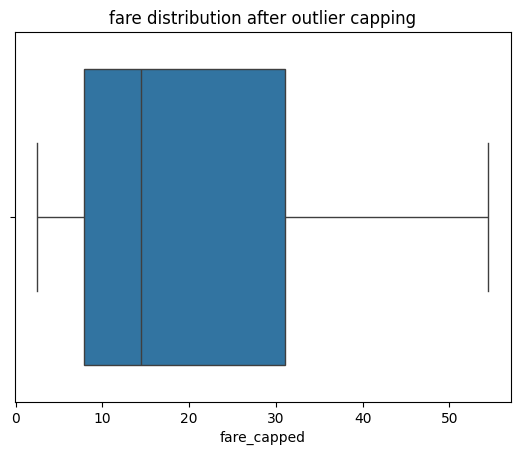

In [ ]:
#outliers
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df["fare"]<lower_bound) | (df["fare"]>upper_bound)]
print("Number of outliers in fare",len(outliers))

df['fare_capped']=df['fare'].clip(lower_bound,upper_bound)
sns.boxplot(x=df["fare_capped"])
plt.title("fare distribution after outlier capping")
plt.show()

**merging**

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/features.csv')

stores = pd.read_csv('/content/drive/MyDrive/stores.csv')

sales = pd.read_csv('/content/drive/MyDrive/train.csv')
df = pd.merge(sales, stores, on="Store", how="left")
df = pd.merge(df, features, on=["Store", "Date"], how="left")
df["Date"] = pd.to_datetime(df["Date"])


# 4. Display First and Last 10 Rows
# -----------------------------
print("\n FIRST 10 ROWS:\n", df.head(10))
print("\n LAST 10 ROWS:\n", df.tail(10))

# -----------------------------
# 5. Basic Structure
# -----------------------------
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:\n")
print(df.describe())

# -----------------------------
# 6. Identify Column Types
# -----------------------------
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
date_cols = df.select_dtypes(include=["datetime64"]).columns

print("\nNumeric Columns:\n", list(numeric_cols))
print("\nCategorical Columns:\n", list(categorical_cols))
print("\nDate Columns:\n", list(date_cols))

# -----------------------------
# 7. Unique store types + departments
# -----------------------------
print("\nUnique Store Types:", df["Type"].unique())
print("\nTotal Unique Departments:", df["Dept"].nunique())
print("Departments:", sorted(df["Dept"].unique()))

# -----------------------------
# 8. Identify columns requiring cleaning or type conversion
# -----------------------------
problem_columns = []

for col in df.columns:
    if df[col].isnull().sum() > 0:
        problem_columns.append(col)

print("\nColumns With Missing Values:", problem_columns)

# Additional checks
print("\nColumns stored as object but should be numeric:")
for col in categorical_cols:
    try:
        df[col].astype(float)
        print(" →", col)
    except:
        pass


 FIRST 10 ROWS:
    Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   
5      1     1 2010-03-12      21043.39        False    A  151315   
6      1     1 2010-03-19      22136.64        False    A  151315   
7      1     1 2010-03-26      26229.21        False    A  151315   
8      1     1 2010-04-02      57258.43        False    A  151315   
9      1     1 2010-04-09      42960.91        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   


In [ ]:
# -----------------------------
# Task 2 — DATA CLEANING
# -----------------------------

# 1. Identify missing values
print("Missing values BEFORE cleaning:\n")
print(df.isnull().sum())


# 2. Fill missing numeric values using MEDIAN
numeric_median_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

for col in numeric_median_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)


# 3. Fill missing Markdown fields using MEAN
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

for col in markdown_cols:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)


# 4. Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])


# 5. Remove duplicate rows
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"\nDuplicate rows removed: {before - after}")


# 6. Reset index
df.reset_index(drop=True, inplace=True)


# 7. Check missing values again
print("\nMissing values AFTER cleaning:\n")
print(df.isnull().sum())

print("\nDataset Shape After Cleaning:", df.shape)



Missing values BEFORE cleaning:

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64


/tmp/ipython-input-4154429024.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-4154429024.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Duplicate rows removed: 0

Missing values AFTER cleaning:

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

Dataset Shape After Cleaning: (421570, 17)


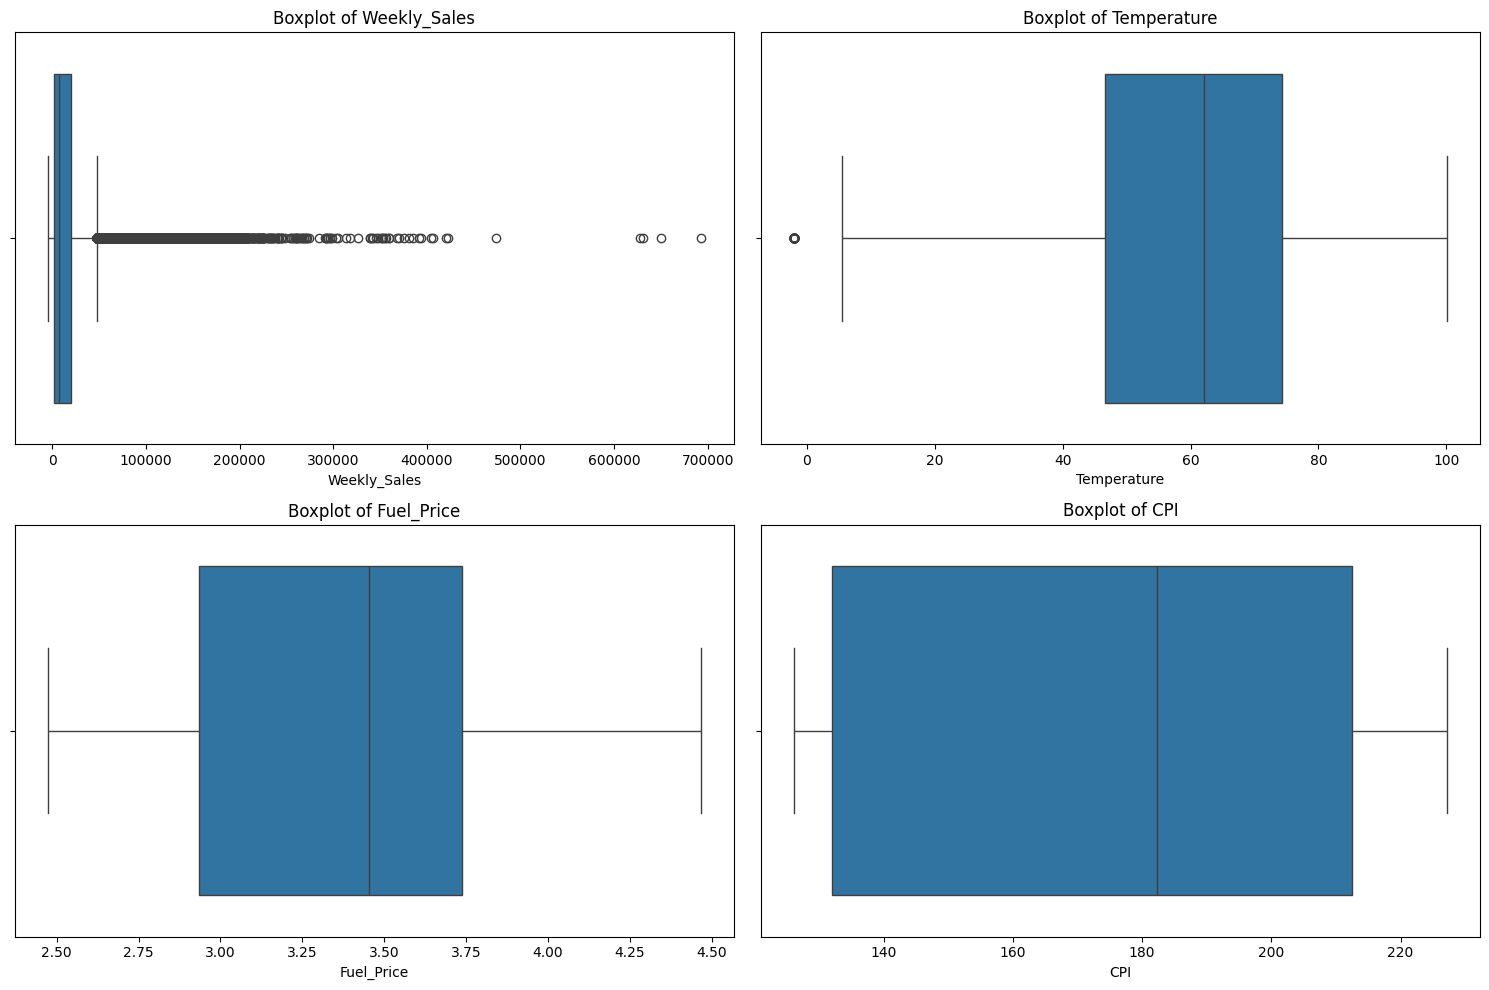


Outliers detected in Weekly_Sales: 35521

Outliers detected in Temperature: 69

Outliers detected in Fuel_Price: 0

Outliers detected in CPI: 0

Holiday Column Detected: IsHoliday_x

Sales spikes during holiday weeks:
     Store  Dept       Date  Weekly_Sales
196      1     2 2011-02-11      47595.35
248      1     2 2012-02-10      50581.06
614      1     5 2010-11-26      70158.86
666      1     5 2011-11-25      79340.15
900      1     7 2010-11-26      72635.06

Outlier treatment completed successfully.

Cleaned dataset shape: (421570, 17)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ==============================
# 0) List of numeric columns
# ==============================
cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI"]


# ==============================
# 1) OUTLIER VISUALIZATION
# ==============================
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# ==============================
# 2) IQR OUTLIER DETECTION
# ==============================
def detect_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\nOutliers detected in {col}: {len(outliers)}")

    return lower_bound, upper_bound


bounds = {}
for col in cols:
    lb, ub = detect_outliers_IQR(df, col)
    bounds[col] = (lb, ub)


# ==============================
# 3) HOLIDAY COLUMN DETECTION
# ==============================
holiday_col = None

# Automatically find the correct IsHoliday column
for col in df.columns:
    if col.lower() == "isholiday":
        holiday_col = col
        break

# If not found, try holiday columns created during merge (IsHoliday_x, IsHoliday_y)
if holiday_col is None:
    for col in df.columns:
        if "isholiday" in col.lower():
            holiday_col = col
            break

print("\nHoliday Column Detected:", holiday_col)


# ==============================
# 4) HOLIDAY SPIKE DETECTION
# ==============================
if holiday_col is not None:
    holiday_spikes = df[(df[holiday_col] == True) &
                        (df["Weekly_Sales"] > bounds["Weekly_Sales"][1])]

    print("\nSales spikes during holiday weeks:")
    print(holiday_spikes[["Store", "Dept", "Date", "Weekly_Sales"]].head())
else:
    print("\n⚠ No holiday column found. Skipping holiday spike detection.")
    holiday_spikes = pd.DataFrame()


# ==============================
# 5) OUTLIER TREATMENT
# ==============================
df_cleaned = df.copy()

for col in cols:

    lb, ub = bounds[col]

    if col == "Weekly_Sales":

        if holiday_col is not None:
            # keep spikes only for holidays
            df_cleaned[col] = df_cleaned.apply(
                lambda row: row[col] if (row[holiday_col] == True and row[col] > ub)
                else min(max(row[col], lb), ub),
                axis=1
            )
        else:
            # no holiday col → cap normally
            df_cleaned[col] = df_cleaned[col].clip(lb, ub)

    else:
        # Other numeric columns → CAP values
        df_cleaned[col] = df_cleaned[col].clip(lb, ub)


print("\nOutlier treatment completed successfully.")
print("\nCleaned dataset shape:", df_cleaned.shape)

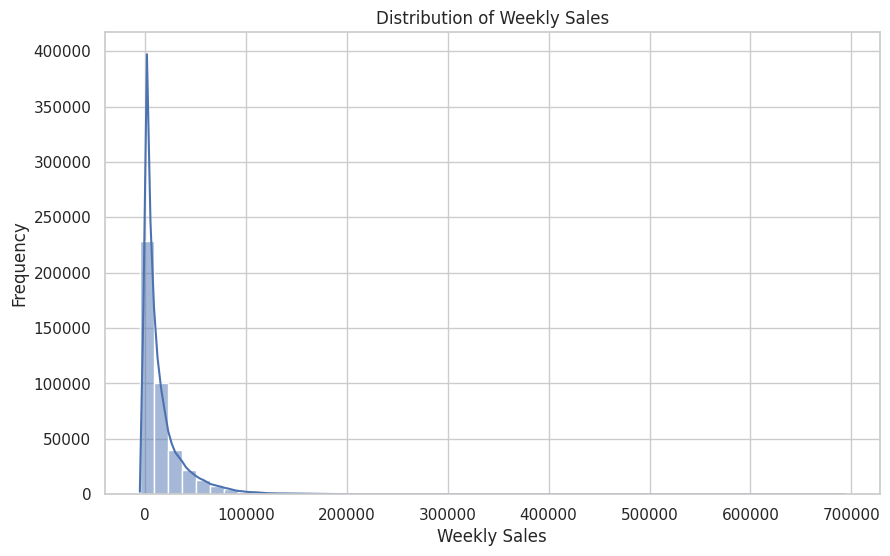

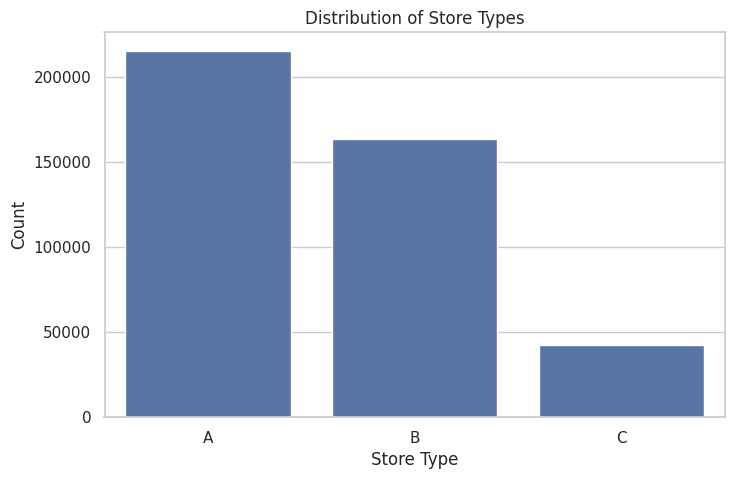

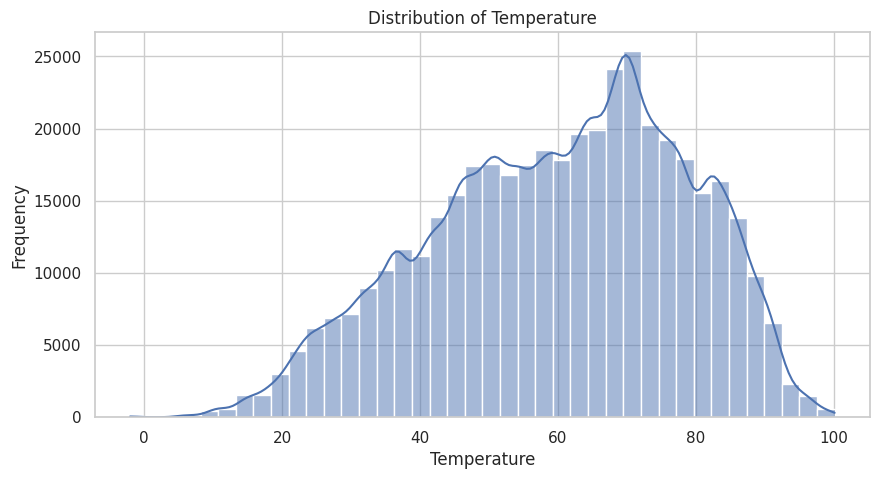

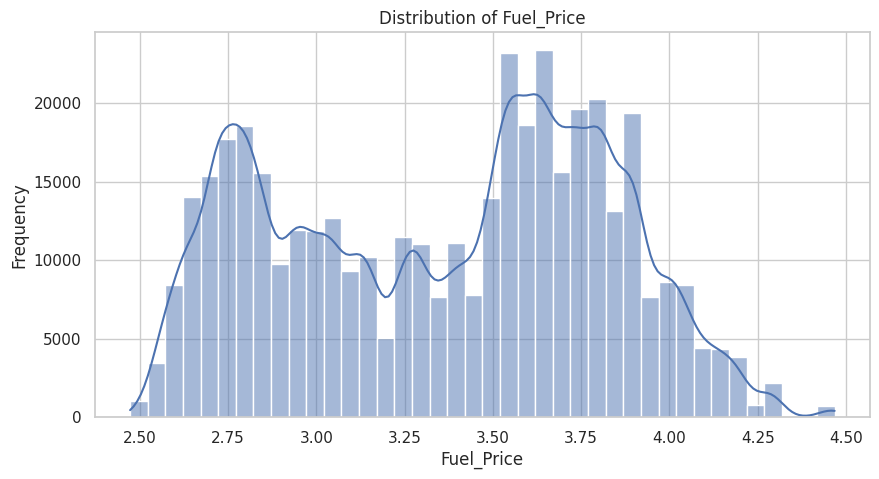

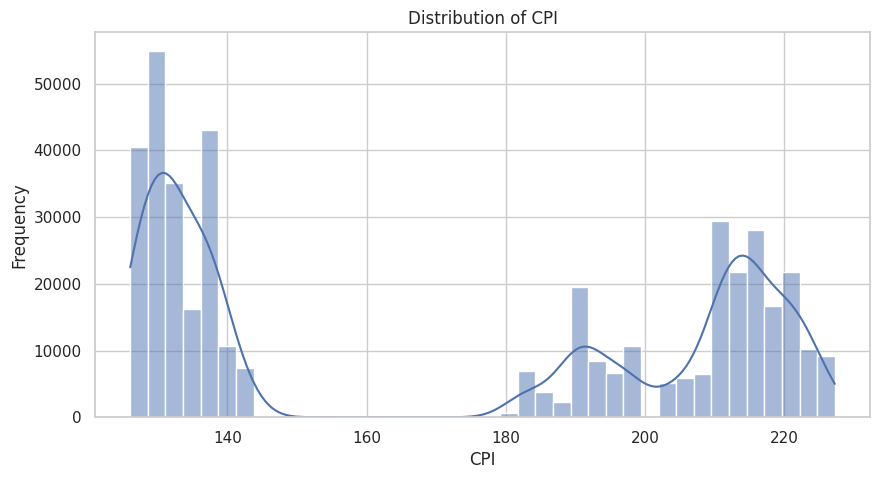

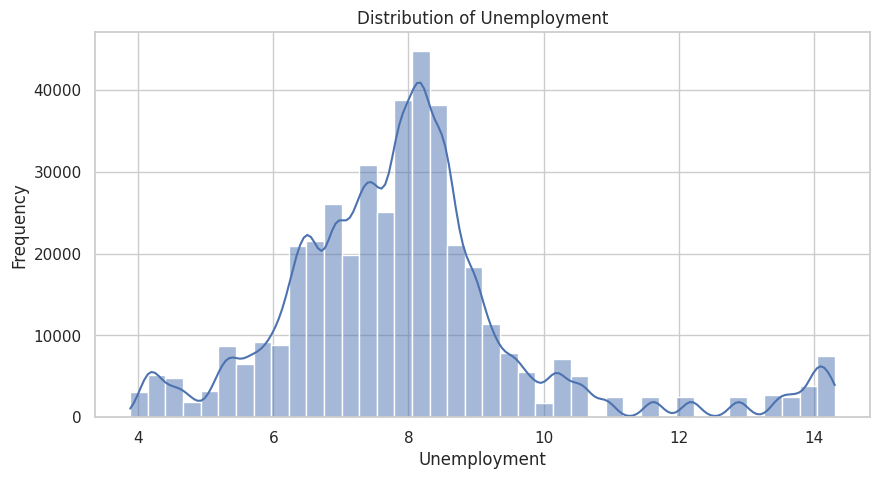

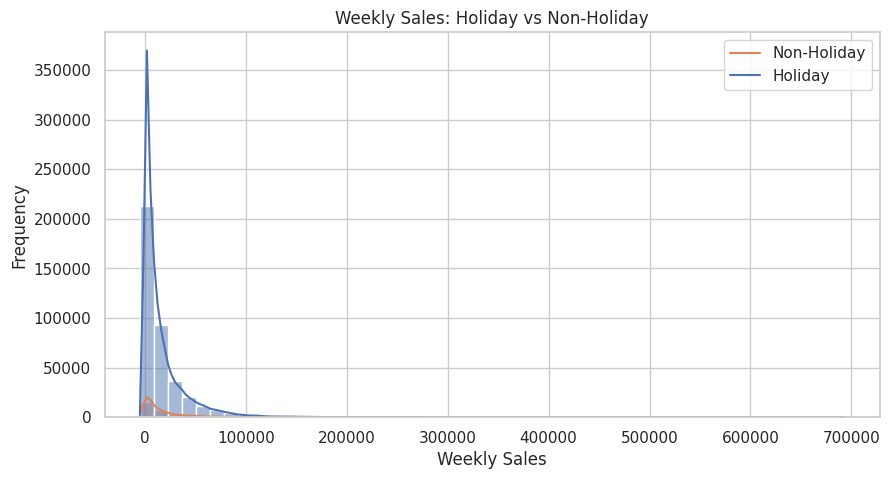

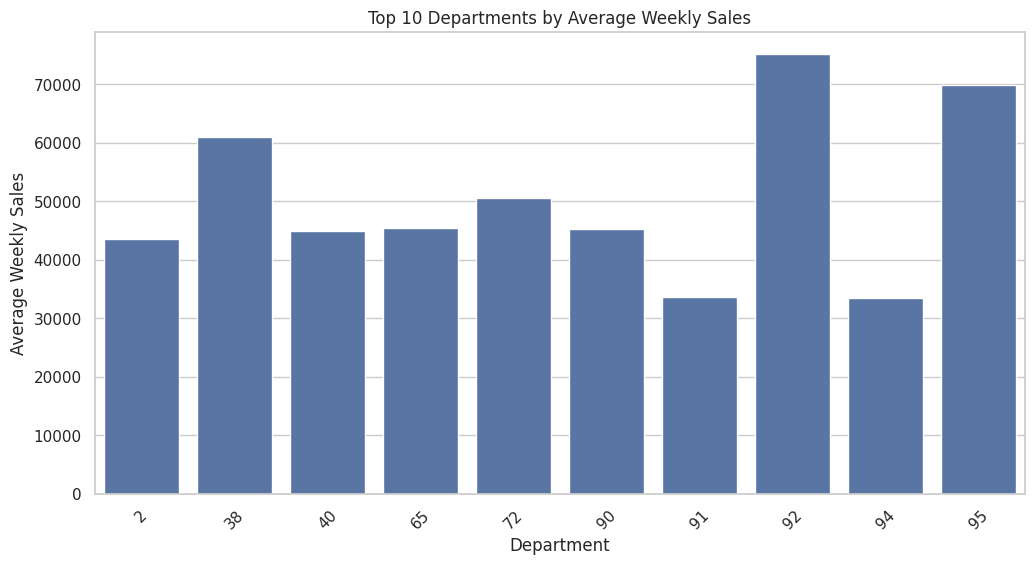


Top 10 Departments by Avg Weekly Sales:
Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -------------------------------
# 1) Weekly Sales Distribution
# -------------------------------

plt.figure(figsize=(10, 6))
sns.histplot(df["Weekly_Sales"], kde=True, bins=50)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


# -------------------------------
# 2) Store Type Distribution
# -------------------------------
if "Type" in df.columns:  # from stores.csv
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df["Type"])
    plt.title("Distribution of Store Types")
    plt.xlabel("Store Type")
    plt.ylabel("Count")
    plt.show()
else:
    print("⚠ No 'Type' column found. Store type distribution skipped.")


# -------------------------------
# 3) Distribution of Temperature, FuelPrice, CPI, Unemployment
# -------------------------------
num_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True, bins=40)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"⚠ Column {col} not found.")


# -------------------------------
# 4) Distribution of Sales:
#    Holiday vs Non-Holiday
# -------------------------------
# Detect holiday column
holiday_col = None

for c in df.columns:
    if c.lower() == "isholiday" or "isholiday" in c.lower():
        holiday_col = c
        break

if holiday_col:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x="Weekly_Sales", hue=df[holiday_col], kde=True, bins=50)
    plt.title("Weekly Sales: Holiday vs Non-Holiday")
    plt.xlabel("Weekly Sales")
    plt.ylabel("Frequency")
    plt.legend(["Non-Holiday", "Holiday"])
    plt.show()
else:
    print("⚠ Holiday column not found — skipping holiday vs non-holiday sales plot.")


# -------------------------------
# 5) Top 10 Departments by Average Weekly Sales
# -------------------------------
plt.figure(figsize=(12, 6))
top_depts = df.groupby("Dept")["Weekly_Sales"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_depts.index, y=top_depts.values)
plt.title("Top 10 Departments by Average Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=45)
plt.show()

print("\nTop 10 Departments by Avg Weekly Sales:")
print(top_depts)





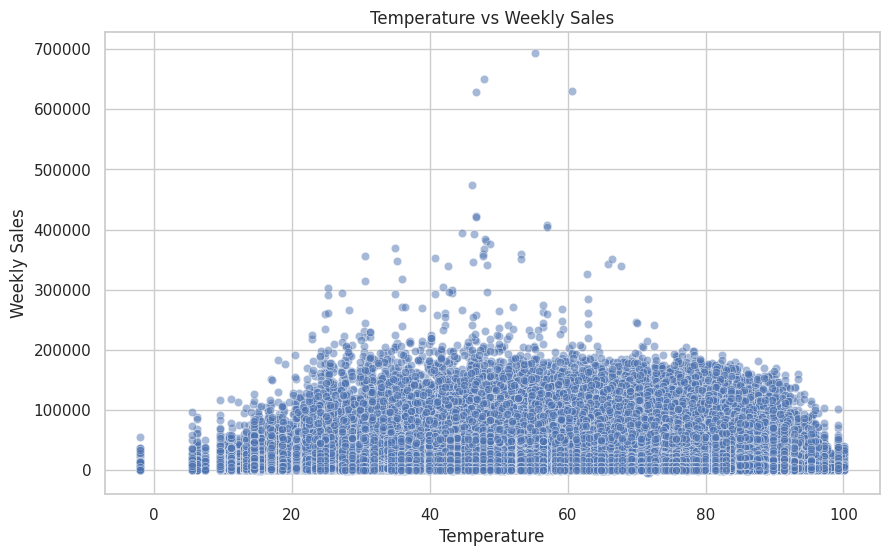

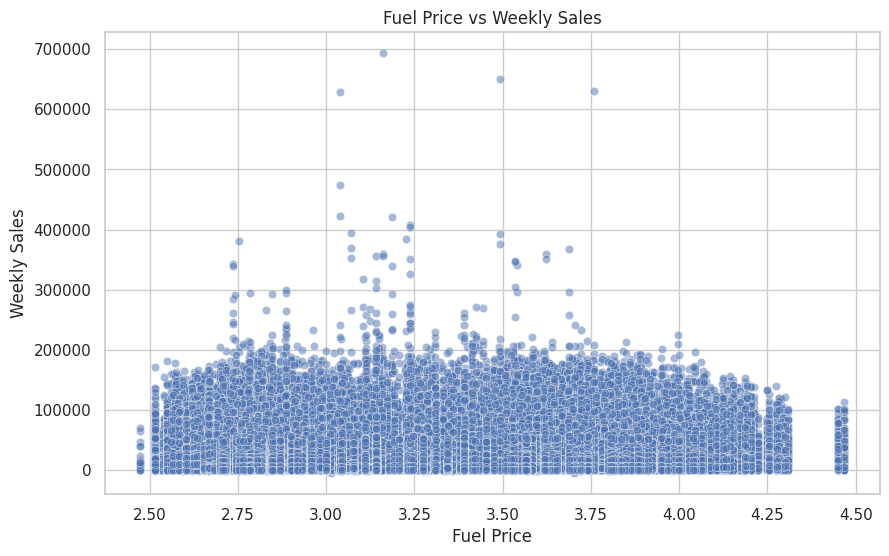

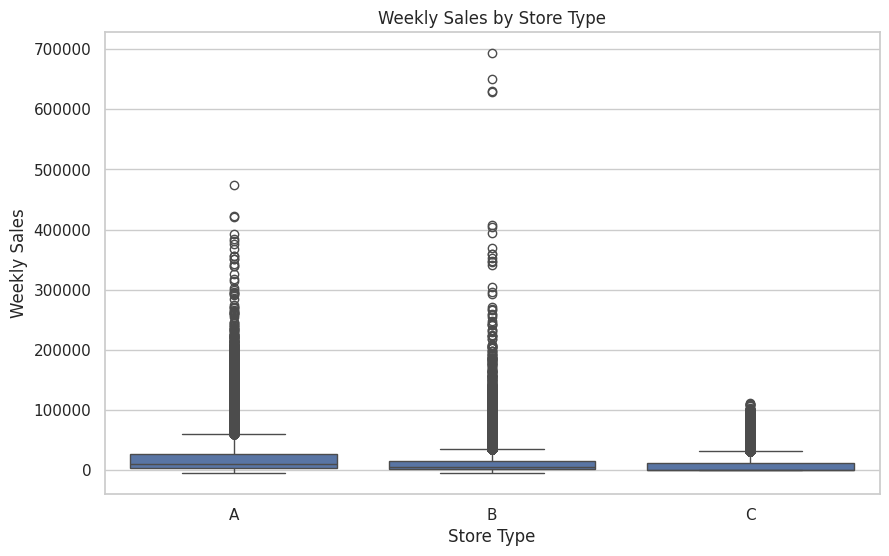

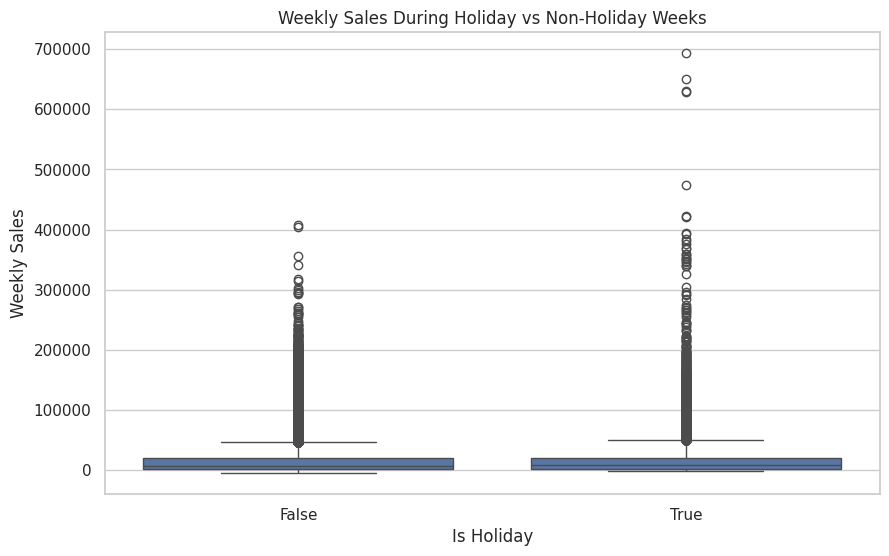


Lowest Performing Store: 5
Highest Performing Store: 20


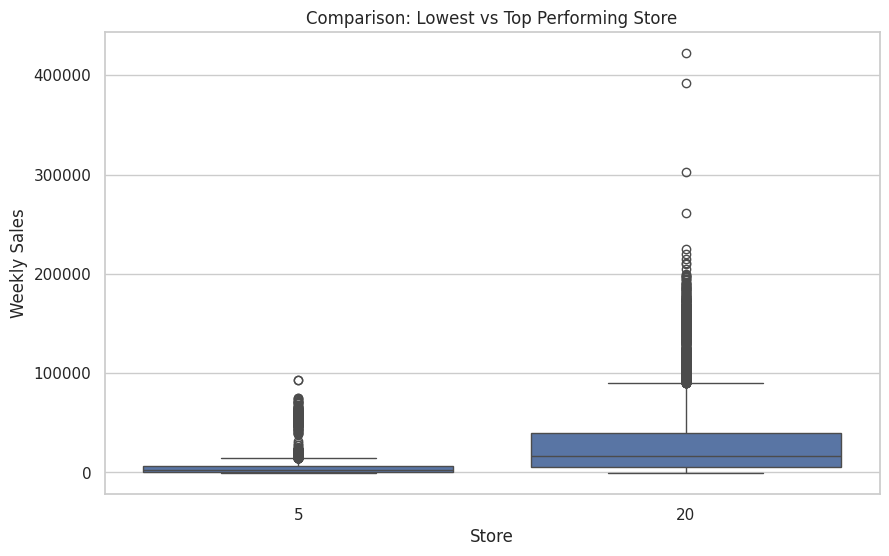

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# =====================================================
# 1) Temperature vs Weekly Sales (Scatter Plot)
# =====================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Temperature", y="Weekly_Sales", alpha=0.5)
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()


# =====================================================
# 2) Fuel Price vs Weekly Sales (Scatter Plot)
# =====================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Fuel_Price", y="Weekly_Sales", alpha=0.5)
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()


# =====================================================
# 3) Weekly Sales vs Store Type (Box Plot)
# =====================================================
if "Type" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="Type", y="Weekly_Sales")
    plt.title("Weekly Sales by Store Type")
    plt.xlabel("Store Type")
    plt.ylabel("Weekly Sales")
    plt.show()
else:
    print("⚠ No 'Type' column found — skipping Store Type vs Weekly Sales.")


# =====================================================
# 4) Weekly Sales vs Holiday Flag (Box Plot)
# =====================================================

# Detect holiday column
holiday_col = None
for c in df.columns:
    if c.lower() == "isholiday" or "isholiday" in c.lower():
        holiday_col = c
        break

if holiday_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=df[holiday_col], y="Weekly_Sales")
    plt.title("Weekly Sales During Holiday vs Non-Holiday Weeks")
    plt.xlabel("Is Holiday")
    plt.ylabel("Weekly Sales")
    plt.show()
else:
    print("⚠ No holiday column found — skipping holiday analysis.")


# =====================================================
# 5) Compare Top-Performing vs Lowest-Performing Store
# =====================================================

# Find avg weekly sales per store
store_sales = df.groupby("Store")["Weekly_Sales"].mean().sort_values()

lowest_store = store_sales.index[0]
top_store = store_sales.index[-1]

print("\nLowest Performing Store:", lowest_store)
print("Highest Performing Store:", top_store)

# Filter the two stores
df_compare = df[df["Store"].isin([lowest_store, top_store])]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_compare, x="Store", y="Weekly_Sales")
plt.title("Comparison: Lowest vs Top Performing Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()